Images successfully split between training and validation sets.
Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Epoch 1/10
125/125 [==============================] - 201s 2s/step - loss: 1.2354 - accuracy: 0.5113 - val_loss: 1.0375 - val_accuracy: 0.5540
Epoch 2/10
125/125 [==============================] - 194s 2s/step - loss: 1.0223 - accuracy: 0.5980 - val_loss: 0.9157 - val_accuracy: 0.6440
Epoch 3/10
125/125 [==============================] - 183s 1s/step - loss: 0.8601 - accuracy: 0.6700 - val_loss: 0.8515 - val_accuracy: 0.6710
Epoch 4/10
125/125 [==============================] - 181s 1s/step - loss: 0.7813 - accuracy: 0.7017 - val_loss: 0.7934 - val_accuracy: 0.6980
Epoch 5/10
125/125 [==============================] - 180s 1s/step - loss: 0.6840 - accuracy: 0.7412 - val_loss: 0.7237 - val_accuracy: 0.7520
Epoch 6/10
125/125 [==============================] - 184s 1s/step - loss: 0.5716 - accuracy: 0.7857 - val_loss: 0.6151 - val_accuracy: 0

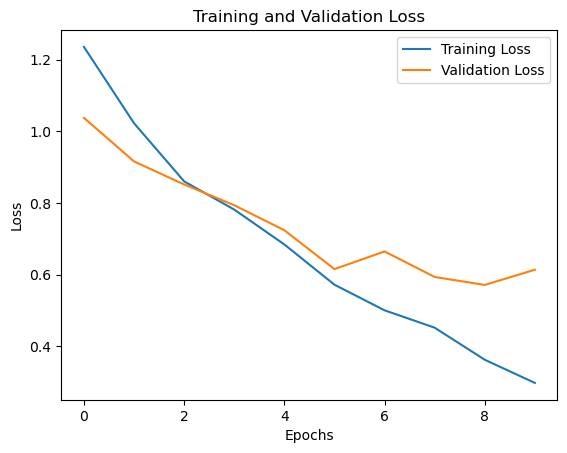

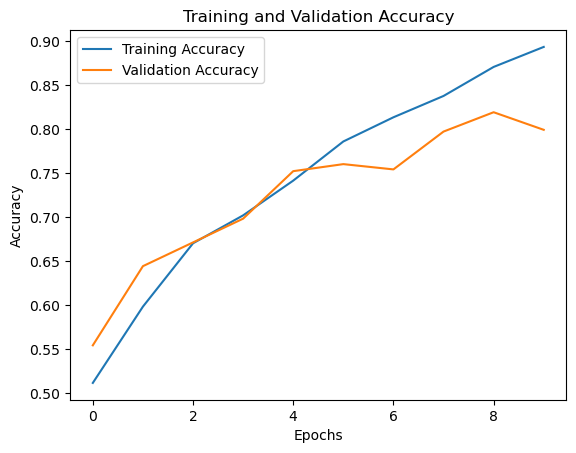

32/32 [==============================] - 21s 655ms/step


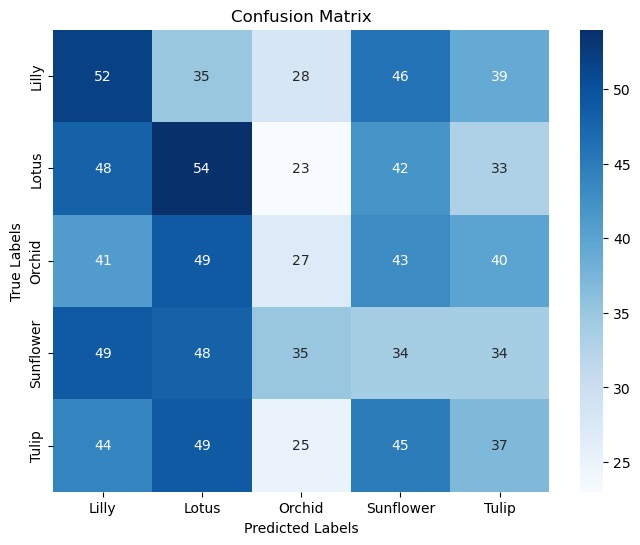

              precision    recall  f1-score   support

       Lilly       0.22      0.26      0.24       200
       Lotus       0.23      0.27      0.25       200
      Orchid       0.20      0.14      0.16       200
   Sunflower       0.16      0.17      0.17       200
       Tulip       0.20      0.18      0.19       200

    accuracy                           0.20      1000
   macro avg       0.20      0.20      0.20      1000
weighted avg       0.20      0.20      0.20      1000



In [24]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

main_directory = 'flower_images'

flower_directories = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

validation_split = 0.2
        
for flower in flower_directories:
    current_flower_dir = os.path.join(main_directory, flower)
    image_filenames = os.listdir(current_flower_dir)

    train_images, validation_images = train_test_split(image_filenames, test_size=validation_split, random_state=42)

    current_validation_dir = os.path.join(current_flower_dir, 'validation')
    os.makedirs(current_validation_dir, exist_ok=True)

    for image in validation_images:
        source_path = os.path.join(current_flower_dir, image)
        destination_path = os.path.join(current_validation_dir, image)
        shutil.move(source_path, destination_path)

print("Images successfully split between training and validation sets.")

main_directory = r'flower_images'

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2

train_generator = train_datagen.flow_from_directory(
    main_directory,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    main_directory,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

model.save('flower_classifier_model.keras')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

y_true = validation_generator.classes
y_pred = model.predict(validation_generator).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=flower_directories, yticklabels=flower_directories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred, target_names=flower_directories)
print(report)

Modify "flower_test.jpg" below with the name of your image to test the model

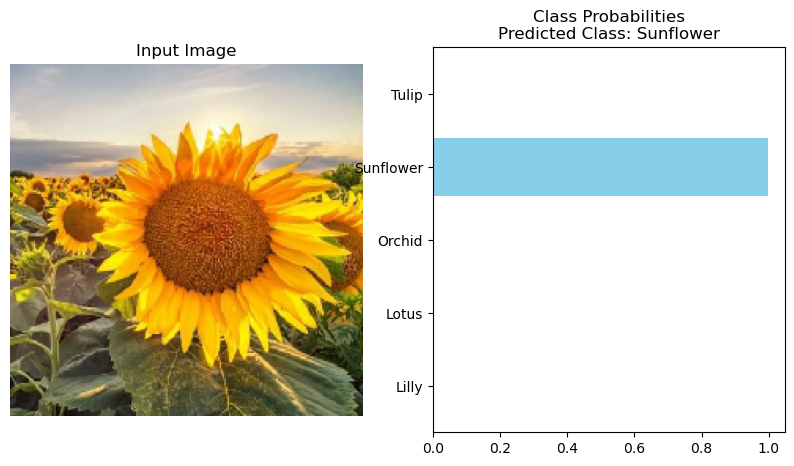

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf

loaded_model = tf.keras.models.load_model('flower_classifier_model.keras')

def predict_flower_class(image_path):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)

    predictions = loaded_model(img_tensor)
    predicted_class = tf.argmax(predictions, axis=1)

    return predicted_class.numpy()[0], predictions.numpy(), img_array[0]

input_image_path = 'flower_test.jpg'
predicted_class, class_probabilities, input_image = predict_flower_class(input_image_path)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(input_image)
ax[0].set_title('Input Image')
ax[0].axis('off')

ax[1].barh(flower_directories, class_probabilities[0], color='skyblue')
ax[1].set_title(f'Class Probabilities\nPredicted Class: {flower_directories[predicted_class]}')

plt.show()